# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 15th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Vivek Mehendiratta

EID: vm24395

Name: Archit Patel

EID: ajp4737

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = self.gama*self.cache + (1-self.gama)*(gradient**2)
        self.coef = self.coef - (self.learning_rate * gradient / (np.sqrt(self.cache) + self.eps))
        
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.momentum = self.mu*self.momentum + self.learning_rate*gradient
        self.coef = self.coef - self.momentum
    
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        
        mse = []
        coefs = []
        X = self.get_features(X)
        self.momentum = 0
        
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                error = self.linearPredict(X[i,:]) - y[i]
    
                coef_reg = self.coef.copy()
                coef_reg[0] = 0 #intercept weight do not participate in regularization
            
                # Compute gradients
                gradient  = error * X[i,:] + self.regularization*coef_reg
               
                # Update weights
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                elif update_rule == 'RMSprop':
                    self.rmsprop(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)    
            mse.append(np.mean(residuals**2))
            
        self.lowest_mse = mse[-1]
        if plot == True:
            # Coeffiecients vs Epoch
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            
            # MSE vs Epoch
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')

    def get_features(self, X):
        x = np.zeros((X.shape[0], 6))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
        
        return x
        
    def linearPredict(self, X_features):
        '''
        returns the dot product of X and self.coef
        '''
        return np.dot(X_features, self.coef)

In [2]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

# Answer:

## SGD with Momentum

In [4]:
result = []
for alpha in learning_rate:
    for pen in regularization:
        reg = LinearRegression(learning_rate=alpha, regularization=pen, n_epoch=n_epochs)
        reg.fit(X,y)
        result.append({'learning_rate' : alpha, 'regularization' : pen, 'MSE' : reg.lowest_mse})

best_comb = sorted(result, key=lambda d: d['MSE'])[0:2]

print("The top best combinations are\n")
for c in best_comb:
    print(c)

C:\Users\mehen\AppData\Local\Temp/ipykernel_26564/2007980046.py:77: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
C:\Users\mehen\AppData\Local\Temp/ipykernel_26564/2007980046.py:67: RuntimeWarning: overflow encountered in multiply
  gradient  = error * X[i,:] + self.regularization*coef_reg
C:\Users\mehen\AppData\Local\Temp/ipykernel_26564/2007980046.py:67: RuntimeWarning: invalid value encountered in multiply
  gradient  = error * X[i,:] + self.regularization*coef_reg
C:\Users\mehen\AppData\Local\Temp/ipykernel_26564/2007980046.py:33: RuntimeWarning: invalid value encountered in add
  self.momentum = self.mu*self.momentum + self.learning_rate*gradient


The top best combinations are

{'learning_rate': 0.001, 'regularization': 0, 'MSE': 0.020195535187159188}
{'learning_rate': 0.001, 'regularization': 0.01, 'MSE': 0.020209040023166654}



Best combination



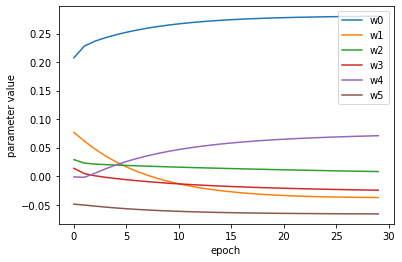

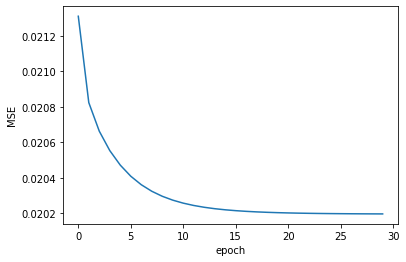

In [5]:
print('\nBest combination\n')
reg = LinearRegression(learning_rate=best_comb[0]['learning_rate'], 
                       regularization=best_comb[0]['regularization'], 
                       n_epoch=n_epochs)
reg.fit(X,y, plot=True)


Second best combination



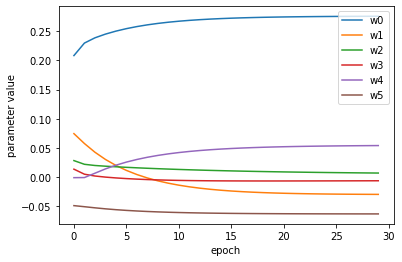

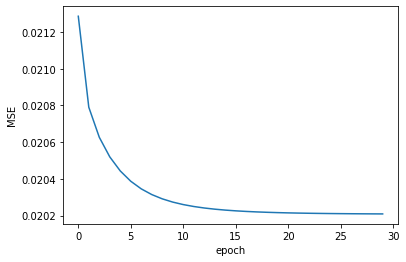

In [6]:
print('\nSecond best combination\n')
reg = LinearRegression(learning_rate=best_comb[1]['learning_rate'], 
                       regularization=best_comb[1]['regularization'], 
                       n_epoch=n_epochs)
reg.fit(X,y, plot=True)

## RMSprop

In [7]:
result = []
for alpha in learning_rate:
    for pen in regularization:
        reg = LinearRegression(learning_rate=alpha, regularization=pen, n_epoch=n_epochs)
        reg.fit(X,y, update_rule='RMSprop')
        result.append({'learning_rate' : alpha, 'regularization' : pen, 'MSE' : reg.lowest_mse})

best_comb = sorted(result, key=lambda d: d['MSE'])[0:2]

print("The top best combinations are\n")
for c in best_comb:
    print(c)

The top best combinations are

{'learning_rate': 0.001, 'regularization': 0, 'MSE': 0.02020236798735304}
{'learning_rate': 0.001, 'regularization': 0.01, 'MSE': 0.02021507484182387}



Best combination



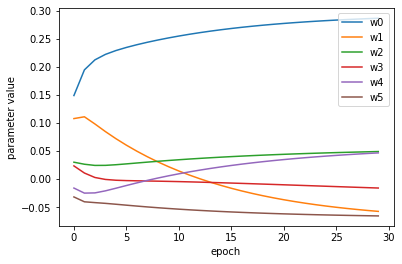

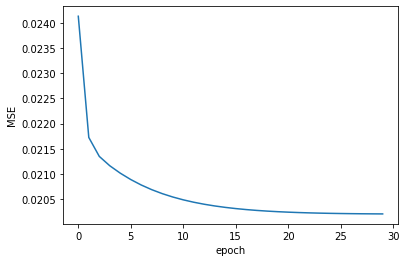

In [26]:
print('\nBest combination\n')
reg = LinearRegression(learning_rate=best_comb[0]['learning_rate'], 
                       regularization=best_comb[0]['regularization'], 
                       n_epoch=n_epochs)
reg.fit(X,y, update_rule='RMSprop', plot=True)


Second best combination



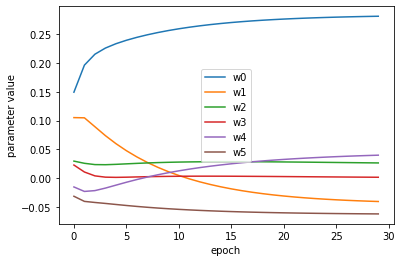

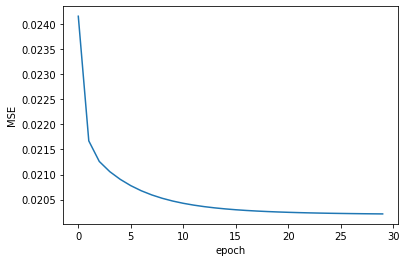

In [27]:
print('\nSecond best combination\n')
reg = LinearRegression(learning_rate=best_comb[1]['learning_rate'], 
                       regularization=best_comb[1]['regularization'], 
                       n_epoch=n_epochs)
reg.fit(X,y, update_rule='RMSprop', plot=True)

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

**a)** Using $tanh$ as the activation function, test and training losses after `1000` epochs are `0.146` and `0.142` respectively. For linear activation function, test and training losses are `0.5` and `0.493`.

Observations: The model is able to capture some trend when using $tanh$ activation function. However, by using just two neurons in the hidden layer, the model is under-fitting and not able to capture the trend completely. In case of a linear activation function, decision boundary will be linear. There is no discernible decision boundary in this case and the losses are also high.

**b)** With 4 neurons in the hidden layer, the model is able to classify almost all of the points accurately with test and training losses of `0.020` and `0.011` respectively. Both test and training losses have dropped to `0.012` and `0.008` when `8` neurons are used in the hidden layer. The `8-neuron hidden layer model` is able to capture the trend much better than a `4-neuron hidden layer model`. As the number of neurons increase in a hidden layer, more non-linearity can be captured.

**c)**

<table style="width:50%">
<tr>
<th>Learning Rate</th>
<th>Epochs</th>
<th>Test loss</th>
<th>Training loss</th>
</tr>

<tr >
<td rowspan=2>10</td>
<td>100</td>
<td>0.440</td>
<td>0.424</td>
</tr>
    
<tr>
<td>1000</td>
<td>0.440</td>
<td>0.424</td>
</tr>
    
<tr>
<td rowspan=2>1</td>
<td>100</td>
<td>0</td>
<td>0</td>
</tr>
    
<tr>
<td>1000</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td rowspan=2>0.1</td>
<td>100</td>
<td>0.012</td>
<td>0.011</td>
</tr>
    
<tr>
<td>1000</td>
<td>0.002</td>
<td>0.001</td>
</tr>
    
<tr>
<td rowspan=2>0.01</td>
<td>100</td>
<td>0.107</td>
<td>0.105</td>
</tr>
    
<tr>
<td>1000</td>
<td>0.011</td>
<td>0.009</td>
</tr>
    
<tr>
<td rowspan=2>0.001</td>
<td>100</td>
<td>0.363</td>
<td>0.389</td>
</tr>
    
<tr>
<td>1000</td>
<td>0.292</td>
<td>0.311</td>
</tr>

**Loss vs Learning rate**: Learning rate is a hyperparameter in neural networks that determines the step size in gradient search. If the learning rate is too low, step size is small and may take too long to converge. On the other hand, if the learning rate is too large, there is a chance of overshooting a minima completely and never converging. When we used 10 as the learning rate, test and training losses remained the same at both 100 and 1000 epochs. Since the step size is large, we are able to make bigger strides in gradient descent. However, we are missing the minima. The model is able to converge faster without overshooting at a learning rate of 1. Within 100 epochs, we are able to find out the minima. As we decrease the learning rate further from 1 to 0.1, 0.01 and 0.001, time to converge keeps on increasing. This is evident by comparing the losses of these three models at both 100 and 1000 epochs.
    
**Loss vs Epochs**: As the number of epochs increase, the model goes through the samples again and again more number of times, fine tuning the weights. This is evident from above when both test and training losses decrease as the number of epochs increase. However, if the model is able to converge much sooner in less number of epochs, then training the model more will not give any better results.

![title](Model1.png)

**d)** A simple model is always preferred to reduce computational costs and to train much faster. We were able to achieve test and training losses of 0 with a very simple model with below configurations:
- Input: $X1 * X2$
- Hidden layers: None
- Learning rate: 10
- Activation function: linear
- Number of epochs: 8

Input $X1 * X2$ alone is sufficient as classification can be done based on the value of $X1 * X2$. If the product is more than 0, data point will be classified as blue. Else, it will be classified as red. There is no need to use a complex model with hidden layers as a simple model is able to achieve 100% accuracy. Learning rate has been set to 10 to converge much faster. A linear activation function requires less computational power. Since the learning rate is high, the model converged in very less number of epochs - 8.

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [10]:
# install pyod using pip first
# !pip install pyod

In [11]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

# Part A

In [12]:
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train

# YOUR CODE SHOULD COME HERE
clf.fit(X_train)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [13]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

# YOUR CODE SHOULD COME HERE
clf.predict(X_test)
clf.decision_function(X_test)
evaluate_print(clf, y_test, clf.decision_function(X_test))

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


# Part B

c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\pyod\models\base.py:343: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


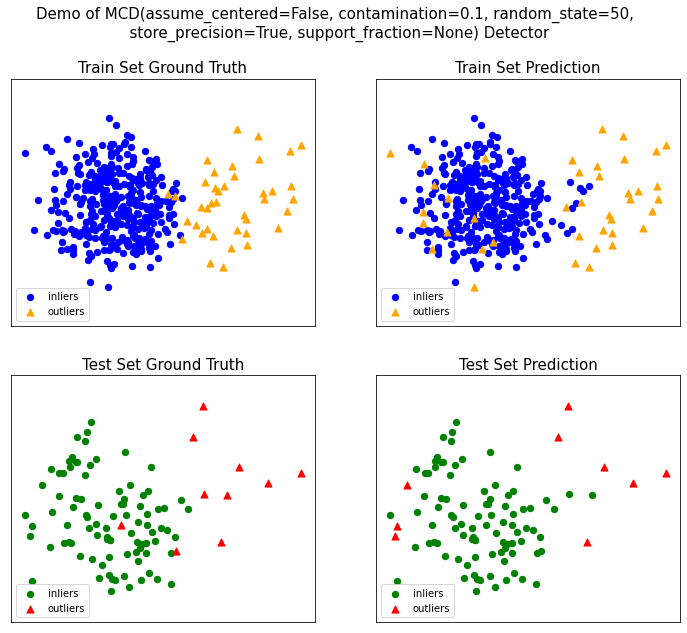

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=50)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train) # YOUR CODE SHOULD COME HERE
test_principalComponents = pca.fit_transform(X_test) # YOUR CODE SHOULD COME HERE

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE
clf = MCD(random_state=50)
clf.fit(X_train, y_train)
visualize(
    clf_name=clf,
    X_train=train_principalComponents, 
    y_train=y_train, 
    X_test=test_principalComponents, 
    y_test=y_test, 
    y_train_pred=clf.predict(X_train), 
    y_test_pred=clf.predict(X_test))

# Part C

In [30]:
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

## CBLOF

c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\pyod\models\base.py:343: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.9167, precision @ rank n:0.6


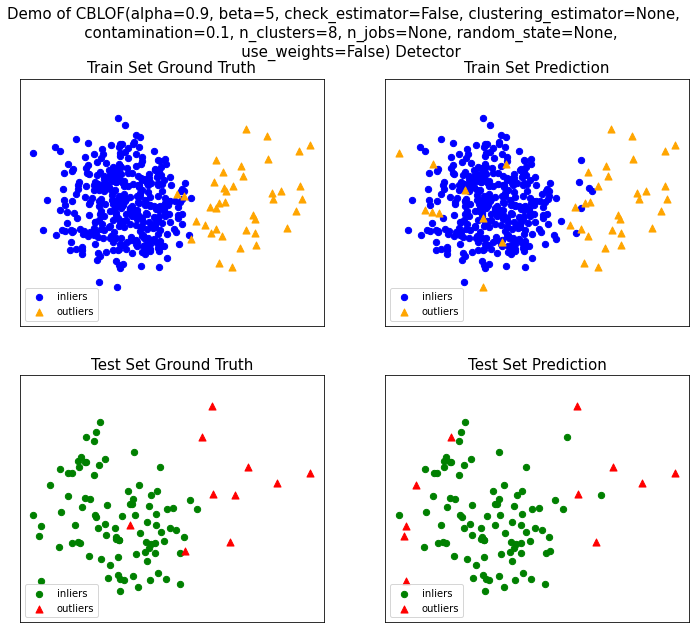

In [32]:
clf = CBLOF()
clf.fit(X_train, y_train)
evaluate_print(clf, y_test, clf.decision_function(X_test))
visualize(
    clf_name=clf,
    X_train=train_principalComponents, 
    y_train=y_train, 
    X_test=test_principalComponents, 
    y_test=y_test, 
    y_train_pred=clf.predict(X_train), 
    y_test_pred=clf.predict(X_test))

## COPOD

c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\pyod\models\base.py:343: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


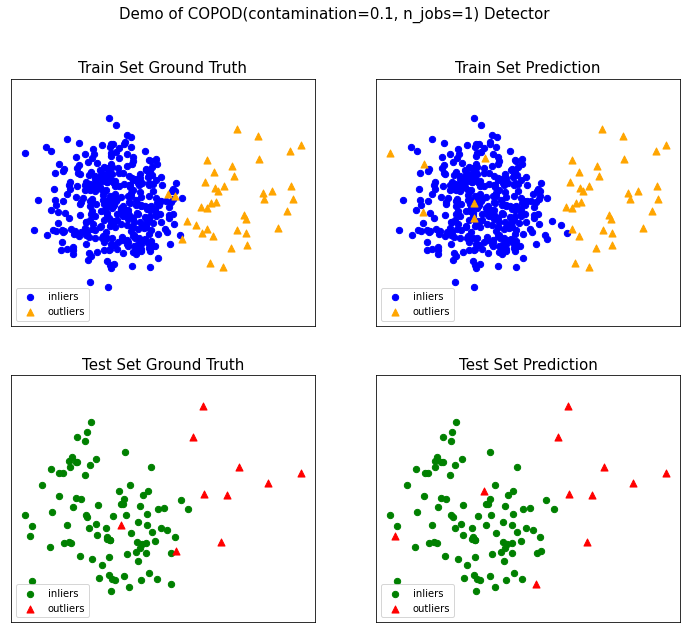

In [33]:
clf = COPOD()
clf.fit(X_train, y_train)
# clf.predict(X_test)
# clf.decision_function(X_test)
evaluate_print(clf, y_test, clf.decision_function(X_test))
visualize(
    clf_name=clf,
    X_train=train_principalComponents, 
    y_train=y_train, 
    X_test=test_principalComponents, 
    y_test=y_test, 
    y_train_pred=clf.predict(X_train), 
    y_test_pred=clf.predict(X_test))

# Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

Principal Component Analysis (PCA) is an unsupervised linear transformation technique that is widely used across many fields. The procedure helps us to identify patterns in the data based on the correlation between the features. Or simply put, it helps to find the directions of maximum variance in high dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

![pca1](PCA1.png)

Here, we can think of x1 and x2 as the feature axes, and PC1 and PC2 as the principal components

For PCA we construct a $d*d$ covariance matrix where d is the number of dimensions in the dataset and it stores the pairwise covariances between different features

![pca2](PCA2.png)

We obtain the eigenpairs of the covariance matrix. For reducing the dimensionality of our dataset by compressing it onto a new feature subspace, we select the principal components (Eigen Vectors) that contain the most information. The eigenvalues define the define the magnitude of the eigenvectors so we select the top K eigenvectors based on the values of their corresponding eigenvalues, construct a projection matrix from the selected vectors and leverage it to transform the data onto lower dimension subspace.



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [18]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [19]:
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [20]:
data_dm = data.copy()
data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'],
                                    bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020],
                                    labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],
                                    include_lowest=True)

binned_yr_dummies = pd.get_dummies(data_dm['binned_yr_built'], drop_first=True)
data_dm.drop('YearBuilt', axis=1, inplace = True)
data_dm = pd.concat([data_dm, binned_yr_dummies], axis=1)


c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [21]:
a = (data_dm.isna().sum() / data.shape[0] > 0.65)

data_dm.drop(a[a].index, axis=1, inplace=True)


d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [22]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
sample_mean = np.mean(sample_ages)

#Population mean
pop_mean = np.mean(data['SalePrice'])

sample_mean, pop_mean

(178292.63125, 180921.19589041095)

# e) 
**(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [25]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value
z_critical = 1.960

#Get population standard deviation
pop_stdev = np.std(data['SalePrice'])

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print("Confidence Interval -->",confidence_interval)
print("Population Mean ------>",pop_mean)

Confidence Interval --> (166527.13279033077, 197657.92720966923)
Population Mean ------> 180921.19589041095


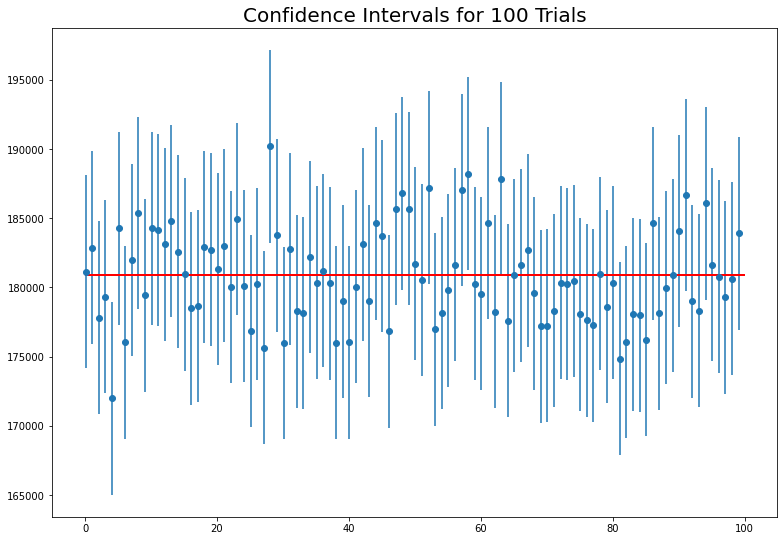

In [24]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical = 1.96
    
    # compute population standard deviation     
    pop_stdev = np.std(data['SalePrice'])
    
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()